## for nicholas


This whole section would greatly benefit if
it was embedded into a strong theoretially underpinned conceptual framework. Fundamentally, you
are investigating how much Omega is changing in response to the increase in DIC:
 
This can be directly estimated by considerting the sensitivity of Omega to DIC, i.e., del Omega/del DIC. (this corresponds to Egleston's w_DIC, but in absolute terms). This gives:
 
Delta Omega = del Omega/del DIC * Delta DIC.
 
Thus the whole section boils down to an investigation of the DIC and
Alk dependency of del Omega/del DI, i.e., del Omega/del DIC as a
function of (DIC,Alk). This could be well illustrated if you
introduced a plot with DIC on the x-axis, Alk on the y-axis, and the
z-coordinate being Omega. As one approaches high DIC for low Alk, the
lines start to crowd, indicating high values of del Omega/del DIC. The
introduction of such a plot would have many advantages, since it would
permit to plot later on all the coastal sites analyzed in the global
analyses, together with the estimated Delta DICs, thus immediately
putting the attention where it needs to be, i.e., your sensitivity depends
on where you start from.


In [7]:
import sys
sys.path.append('/data/tjarniko/mocsy')

import mocsy

import numpy as np
import matplotlib.pyplot as plt
from cmocean import cm
import pandas as pd

import pickle
import arrow
from salishsea_tools import viz_tools
import netCDF4 as nc
import glob
from decimal import Decimal

#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11

import warnings
warnings.simplefilter('ignore')


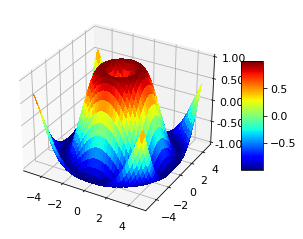

In [8]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='jet',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

##### this is where to find GLODAP DATASET

http://localhost:8805/notebooks/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/KEY_PAPERFIGURES/MF05_and_SF12-13_maps.ipynb

##### let's make a meshmask of omegas


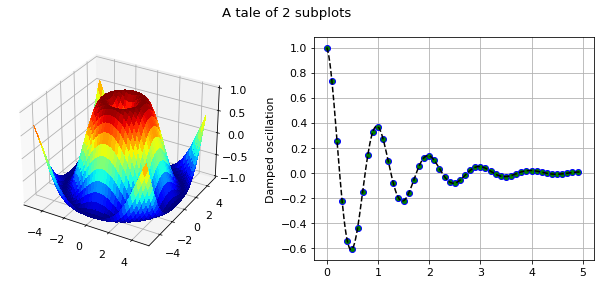

In [13]:



def f(t):
    return np.cos(2*np.pi*t) * np.exp(-t)


# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=plt.figaspect(0.45))
fig.suptitle('A tale of 2 subplots')

# First subplot
ax = fig.add_subplot(1, 2, 2)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

ax.plot(t1, f(t1), 'bo',
        t2, f(t2), 'k--', markerfacecolor='green')
ax.grid(True)
ax.set_ylabel('Damped oscillation')

# Second subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, cmap='jet', rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1, 1)

plt.tight_layout()
plt.show()


In [17]:
DIC_ar = DIC[:,0]
TA_ar = TA[0,:]
print(TA_ar)

[1800. 1810. 1820. 1830. 1840. 1850. 1860. 1870. 1880. 1890. 1900. 1910.
 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000. 2010. 2020. 2030.
 2040. 2050. 2060. 2070. 2080. 2090. 2100. 2110. 2120. 2130. 2140. 2150.
 2160. 2170. 2180. 2190.]


[1800. 1810. 1820. 1830. 1840. 1850. 1860. 1870. 1880. 1890. 1900. 1910.
 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000. 2010. 2020. 2030.
 2040. 2050. 2060. 2070. 2080. 2090. 2100. 2110. 2120. 2130. 2140. 2150.
 2160. 2170. 2180. 2190.]


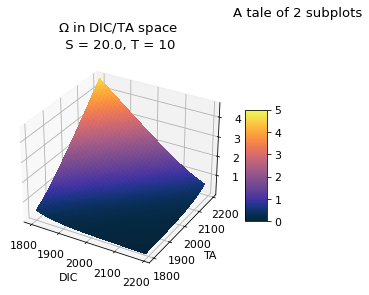

In [52]:
#salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 

#salinity 0-35
#
S = np.zeros([40,40])
T = np.zeros([40,40])
TA = np.zeros([40,40])
DIC = np.zeros([40,40])

S[:] = 20
T[:] = 10

for i in range(0,40):
    DIC[:,i] = 1800 + 10*i
for i in range(0,40):
    TA[i,:] = 1800 + 10*i

DIC_ar = DIC[0,:]
TA_ar = TA[:,0]  
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC) * 1e-6
TAr = np.ravel(TA) * 1e-6

zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vTD = pH.reshape(40,40)
OmegaAr_vTD = OmegaA.reshape(40,40)


# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=plt.figaspect(0.45))
fig.suptitle('A tale of 2 subplots')

# First subplot
# ax = fig.add_subplot(1, 2, 2)

# t1 = np.arange(0.0, 5.0, 0.1)
# t2 = np.arange(0.0, 5.0, 0.02)
# t3 = np.arange(0.0, 2.0, 0.01)

# ax.plot(t1, f(t1), 'bo',
#         t2, f(t2), 'k--', markerfacecolor='green')
# ax.grid(True)
# ax.set_ylabel('Damped oscillation')

# Second subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = TA_ar
Y = DIC_ar
X, Y = np.meshgrid(X, Y)

print(Y[:,0])

Z = OmegaAr_vTD

surf = ax.plot_surface(X, Y, Z, cmap=cm.thermal, rstride=1, cstride=1,
                       linewidth=0, vmin = 0, vmax = 5, antialiased=False)
ax.set_xlabel('DIC')
ax.set_ylabel('TA')
ax.set_title(f'$\Omega$ in DIC/TA space \n S = {S[0,0]}, T = 10')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()

plt.show()


[1800. 1810. 1820. 1830. 1840. 1850. 1860. 1870. 1880. 1890. 1900. 1910.
 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000. 2010. 2020. 2030.
 2040. 2050. 2060. 2070. 2080. 2090. 2100. 2110. 2120. 2130. 2140. 2150.
 2160. 2170. 2180. 2190.]


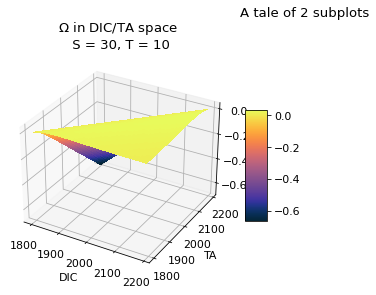

In [54]:
#salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 

#salinity 0-35
#
S = np.zeros([40,40])
T = np.zeros([40,40])
TA = np.zeros([40,40])
DIC = np.zeros([40,40])

S[:] = 35
T[:] = 10

for i in range(0,40):
    DIC[:,i] = 1800 + 10*i
for i in range(0,40):
    TA[i,:] = 1800 + 10*i

DIC_ar = DIC[0,:]
TA_ar = TA[:,0]  
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC) * 1e-6
TAr = np.ravel(TA) * 1e-6

zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vTD = pH.reshape(40,40)
OmegaAr_vTD2 = OmegaA.reshape(40,40)


# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=plt.figaspect(0.45))
fig.suptitle('A tale of 2 subplots')

# First subplot
# ax = fig.add_subplot(1, 2, 2)

# t1 = np.arange(0.0, 5.0, 0.1)
# t2 = np.arange(0.0, 5.0, 0.02)
# t3 = np.arange(0.0, 2.0, 0.01)

# ax.plot(t1, f(t1), 'bo',
#         t2, f(t2), 'k--', markerfacecolor='green')
# ax.grid(True)
# ax.set_ylabel('Damped oscillation')

# Second subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = TA_ar
Y = DIC_ar
X, Y = np.meshgrid(X, Y)

print(Y[:,0])

Z = OmegaAr_vTD2 - OmegaAr_vTD

surf = ax.plot_surface(X, Y, Z, cmap=cm.thermal, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
ax.set_xlabel('DIC')
ax.set_ylabel('TA')
ax.set_title('$\Omega$ in DIC/TA space \n S = 30, T = 10')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()

plt.show()


[1800. 1810. 1820. 1830. 1840. 1850. 1860. 1870. 1880. 1890. 1900. 1910.
 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000. 2010. 2020. 2030.
 2040. 2050. 2060. 2070. 2080. 2090. 2100. 2110. 2120. 2130. 2140. 2150.
 2160. 2170. 2180. 2190.]
4.169394913686067


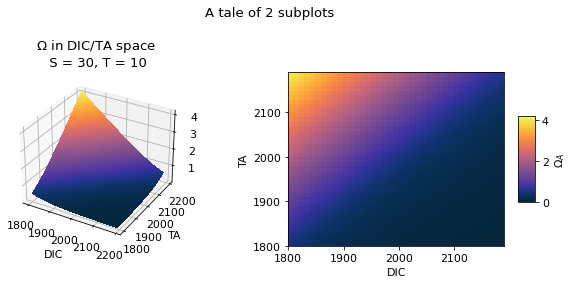

In [63]:
#salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 

#salinity 0-35
#
S = np.zeros([40,40])
T = np.zeros([40,40])
TA = np.zeros([40,40])
DIC = np.zeros([40,40])

S[:] = 30
T[:] = 10

for i in range(0,40):
    DIC[:,i] = 1800 + 10*i
for i in range(0,40):
    TA[i,:] = 1800 + 10*i

DIC_ar = DIC[0,:]
TA_ar = TA[:,0]  
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC) * 1e-6
TAr = np.ravel(TA) * 1e-6

zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vTD = pH.reshape(40,40)
OmegaAr_vTD = OmegaA.reshape(40,40)


# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=plt.figaspect(0.45))
fig.suptitle('A tale of 2 subplots')

# Second subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = TA_ar
Y = DIC_ar
X, Y = np.meshgrid(X, Y)

print(Y[:,0])

Z = OmegaAr_vTD
print(np.max(Z))

surf = ax.plot_surface(X, Y, Z, vmin = 0, vmax = 4.2, cmap=cm.thermal, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
ax.set_xlabel('DIC')
ax.set_ylabel('TA')
ax.set_title('$\Omega$ in DIC/TA space \n S = 30, T = 10')
# fig.colorbar(surf, shrink=0.5, aspect=5, label = '$\Omega_A$')

# First subplot
ax = fig.add_subplot(1, 2, 2)
w = ax.pcolormesh(X, Y,OmegaAr_vTD, vmin = 0, vmax = 4.2, \
                  cmap = cm.thermal)
ax.set_xlabel('DIC')
ax.set_ylabel('TA')

fig.colorbar(w, shrink=0.5, aspect=5, label = '$\Omega_A$')

# t1 = np.arange(0.0, 5.0, 0.1)
# t2 = np.arange(0.0, 5.0, 0.02)
# t3 = np.arange(0.0, 2.0, 0.01)

# ax.plot(t1, f(t1), 'bo',
#         t2, f(t2), 'k--', markerfacecolor='green')
# ax.grid(True)
# ax.set_ylabel('Damped oscillation')

plt.tight_layout()

plt.show()
